In [18]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sb 
from scipy.io import loadmat 
#Load Data 
data = loadmat('D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\7- ex7data2.mat')
#print(data) 
print('the shape of data [x] is' ,data['X'].shape)#The Shape Of Data Is 300 Row * 2 Columns
print('**'*50)
print(data['X'])

the shape of data [x] is (300, 2)
****************************************************************************************************
[[ 1.84207953  4.6075716 ]
 [ 5.65858312  4.79996405]
 [ 6.35257892  3.2908545 ]
 [ 2.90401653  4.61220411]
 [ 3.23197916  4.93989405]
 [ 1.24792268  4.93267846]
 [ 1.97619886  4.43489674]
 [ 2.23454135  5.05547168]
 [ 2.98340757  4.84046406]
 [ 2.97970391  4.80671081]
 [ 2.11496411  5.37373587]
 [ 2.12169543  5.20854212]
 [ 1.5143529   4.77003303]
 [ 2.16979227  5.27435354]
 [ 0.41852373  4.88312522]
 [ 2.47053695  4.80418944]
 [ 4.06069132  4.99503862]
 [ 3.00708934  4.67897758]
 [ 0.66632346  4.87187949]
 [ 3.1621865   4.83658301]
 [ 0.51155258  4.91052923]
 [ 3.1342801   4.96178114]
 [ 2.04974595  5.6241395 ]
 [ 0.66582785  5.24399257]
 [ 1.01732013  4.84473647]
 [ 2.17893568  5.29758701]
 [ 2.85962615  5.26041997]
 [ 1.30882588  5.30158701]
 [ 0.99253246  5.01567424]
 [ 1.40372638  4.57527684]
 [ 2.66046572  5.19623848]
 [ 2.79995882  5.11526323]
 

In [20]:
#Make Function To Select An Intial_Centriods Random From Data 
def intial_centroids(x,k):
    m,n=x.shape #M ==> 300 Rows & N ==> 2 Columns
    centroids =np.zeros((k,n))# Make Zero Matrix K == 3 Points & N == 2 Columns
    points = np.random.randint(0,m,k)#Choose 3 Numbers From 0 To M==300
    for i in range(k):
        centroids[i,:]=x[points[i],:]
    return centroids
#====================================================================================
#Make Function To Choose Selection Points Closet hers 
def find_closeset_centroids(x,cen):
    m = x.shape[0]#M ==> Number Of Rows In Data X That Equal 300
    k =cen.shape[0] #K Is == 3
    idx = np.zeros(m)#Idx Is About List Contains 300 Zeros [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ......]
    for i in range (m):#I Is About 300 Numbers 
        minimum_distance = 1000000
        for j in range(k): # J is about ==> 0 , 1 , 2
            real_distance =np.sum((x[i,:] - cen[j , : ] ) ** 2 )
            if real_distance < minimum_distance:
                minimum_distance =real_distance
                idx[i]= j
    return idx 
#===========================================================================================

In [23]:
#Make Function Calculate The Displacement For New Centroids 
def compute_centroids(x,idx,k):
    m,n =x.shape #M The Number Of Rows That == 300 && N is The Number Of Column That == 2
    new_centroids = np.zeros((k,n))
    for i in range (k):
        indices = np.where(idx == i)#Meaning Take The Value For Idx When IDX==I(0,1,2)
        new_centroids[i,:]=(np.sum(x[indices,:] ,axis=1) / len(indices[0])).ravel()
    return new_centroids
#====================================================================================
#Make Function To Apply K-Means Algorithm
def run_k_means(x,int_cen,max_iter):
    m,n = x.shape
    k = int_cen.shape[0]
    idx = np.zeros(m)
    centroids = int_cen
    for i in range(max_iter):
        idx = find_closeset_centroids(x,centroids) #Make Selection For Points
        centroids =compute_centroids(x,idx,k)
    return idx ,centroids
#======================================================================================


In [22]:
#First Step Make Classfying For Data 
x_data =data['X']
init_centroids = intial_centroids(x_data,3)
print(init_centroids)
print('**'*30)
points =find_closeset_centroids(x_data,init_centroids)
print(points)
print('**'*40)
#Clacultae The New Centroids 
c = compute_centroids(x_data,points ,3 )
print(c)

[[3.2038001  1.02728075]
 [7.28780324 2.75179885]
 [0.94623208 0.24522253]]
************************************************************
[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 1. 0. 0. 0. 2. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 2. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 2. 2. 2. 0. 0. 0. 1. 0. 0. 0. 2. 0. 0. 0. 2. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 2. 0. 0. 0. 0. 0. 2. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

[[3.2038001  1.02728075]
 [7.28780324 2.75179885]
 [0.94623208 0.24522253]]
[0. 1. 1.

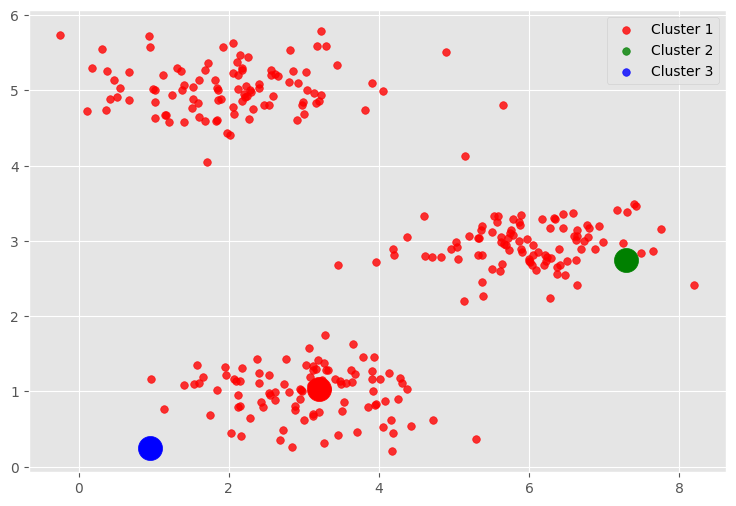

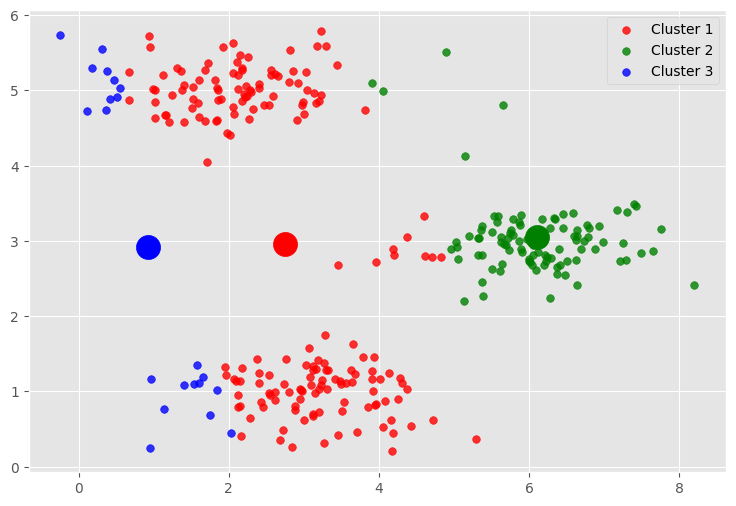

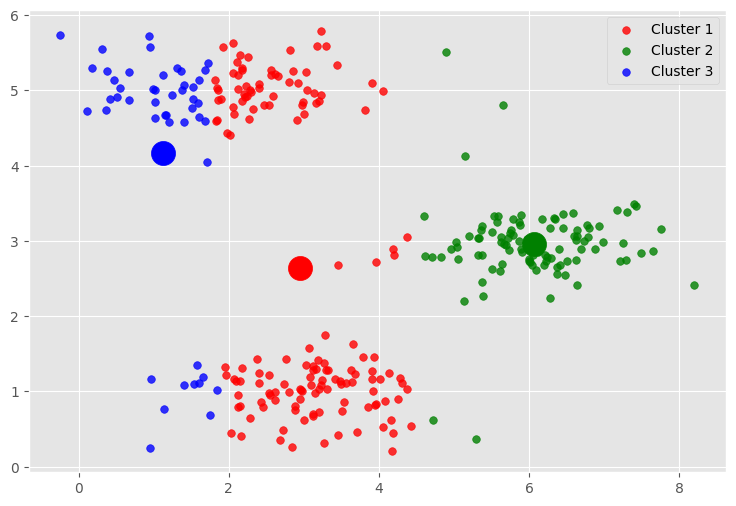

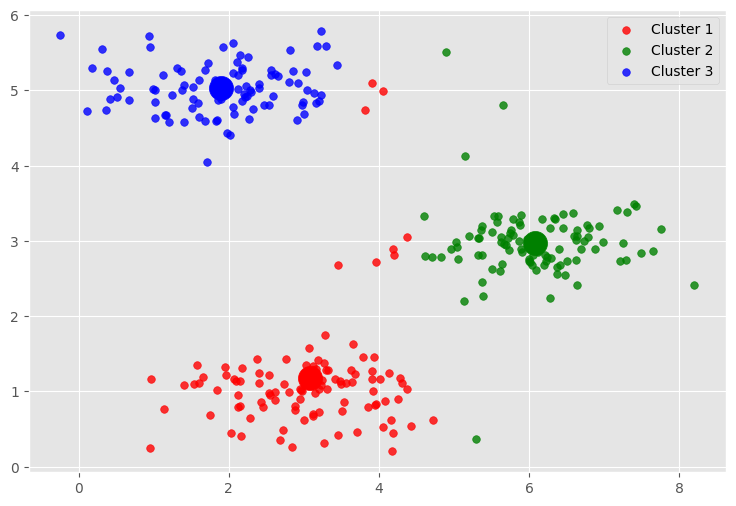

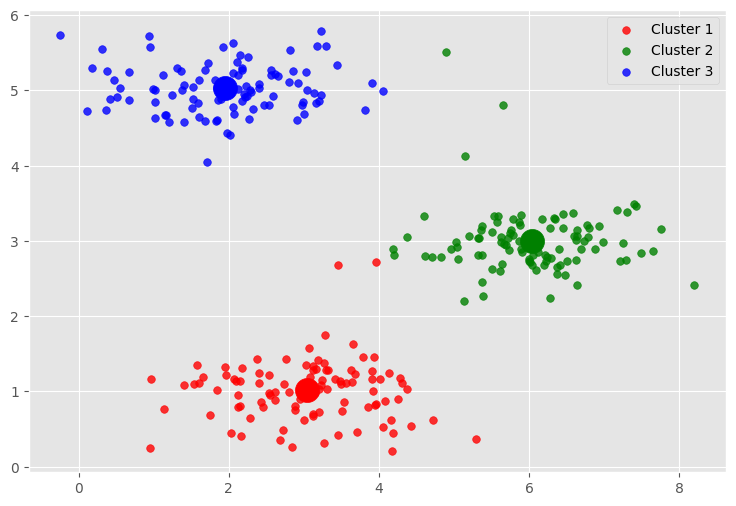

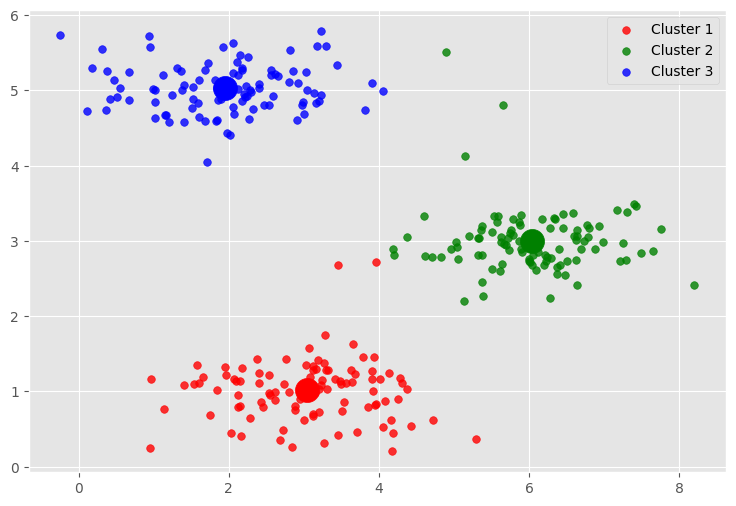

In [27]:
#Draw The Clusters And Repeat The Step Selection & Displacement 6 Times 
for r in range(6):
    #Fisrt Step Make And Apply K-Means
    points,centroids=run_k_means(x_data,init_centroids,r)
    print(points)
    print()
    print(centroids)
    #Draw And Make Clusters
    cluster1 = x_data[np.where(points == 0)[0],:]
    cluster2 = x_data[np.where(points == 1)[0],:]
    cluster3 = x_data[np.where(points == 2)[0],:]
    plt.style.use('ggplot')
    fig,ax =plt.subplots(figsize =(9,6))
    ax.scatter(cluster1[:,0],cluster1[:,1],s=30,color='r',alpha = 0.8,label = 'Cluster 1')
    ax.scatter(centroids[0,0],centroids[0,1],s=300,color ='r')
    
    ax.scatter(cluster2[:,0],cluster2[:,1],s= 30 ,color ='g',alpha = 0.8,label ='Cluster 2')
    ax.scatter(centroids[1,0],centroids[1,1],s=300,color='g')
    
    ax.scatter(cluster3[:,0],cluster3[:,1],s=30,color='b',alpha = 0.8,label ='Cluster 3')
    ax.scatter(centroids[2,0],centroids[2,1],s = 300 ,color ='b')
    ax.legend()

The Shape Of Image Data Is ==>  (128, 128, 3)
****************************************************************************************************
The Image Shape After Make Reshaping Process Is ==>  (16384, 3)
		The Image 16 Centroids Is 
 [[0.3254902  0.31764706 0.34901961]
 [0.11372549 0.11764706 0.12156863]
 [0.08235294 0.09411765 0.07058824]
 [0.2627451  0.27843137 0.25882353]
 [0.17647059 0.2        0.18431373]
 [0.9372549  0.81568627 0.54509804]
 [0.47058824 0.39215686 0.23921569]
 [0.8        0.67843137 0.44705882]
 [0.83921569 0.74117647 0.50588235]
 [0.49411765 0.38431373 0.34117647]
 [0.83137255 0.70980392 0.40784314]
 [0.3372549  0.31764706 0.33333333]
 [0.17254902 0.15294118 0.17254902]
 [0.78039216 0.63137255 0.65098039]
 [0.58431373 0.43137255 0.40392157]
 [0.08235294 0.09411765 0.07843137]]


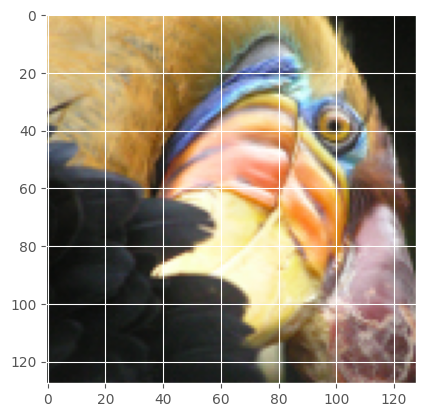

In [37]:
#Example Two Because To Explain Demionsially Reduction For Image 
image_data = loadmat('D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\8- bird_small.mat')
#print(image_data)
A_data =image_data['A']
print('The Shape Of Image Data Is ==> ',A_data.shape)
plt.imshow(A_data)
#First Step For Dimensionally Reduction Make Normalize For Data
print('**'*50) 
A_data =A_data / 255
#Next Step Make Reshape For Image 
image_reshape = np.reshape(A_data,(A_data.shape[0] * A_data.shape[1],A_data.shape[2]))
print('The Image Shape After Make Reshaping Process Is ==> ',image_reshape.shape)
#Step Three Choose Centroids By Randomly 
#Ranomly Intialize The Centroids 
image_initial_centroids =intial_centroids(image_reshape,16)
print('\t\tThe Image 16 Centroids Is \n',image_initial_centroids)

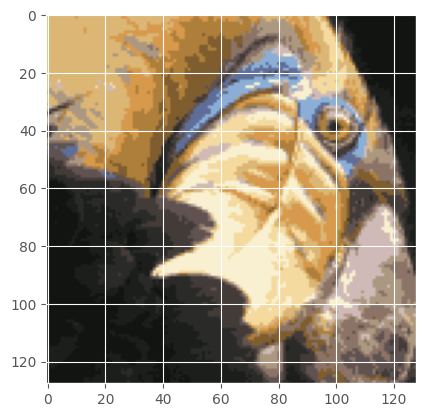

In [39]:
#The Next Step Run Algorithm (K-means Algorithm )
image_idx,image_centroids =run_k_means(image_reshape,image_initial_centroids,35)
image_idx =find_closeset_centroids(image_reshape,image_centroids)
#Make Image Recovered To Return The New Image 
image_recovered=image_centroids[image_idx.astype(int),:]
image_recovered = np.reshape(image_recovered,(A_data.shape[0],A_data.shape[1],A_data.shape[2]))
plt.imshow(image_recovered)

In [40]:
#Applying PCA ==> Principal Components Analysis
data = loadmat('D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\9- ex7data1.mat')
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 22:41:44 2011', '__version__': '1.0', '__globals__': [], 'X': array([[3.38156267, 3.38911268],
       [4.52787538, 5.8541781 ],
       [2.65568187, 4.41199472],
       [2.76523467, 3.71541365],
       [2.84656011, 4.17550645],
       [3.89067196, 6.48838087],
       [3.47580524, 3.63284876],
       [5.91129845, 6.68076853],
       [3.92889397, 5.09844661],
       [4.56183537, 5.62329929],
       [4.57407171, 5.39765069],
       [4.37173356, 5.46116549],
       [4.19169388, 4.95469359],
       [5.24408518, 4.66148767],
       [2.8358402 , 3.76801716],
       [5.63526969, 6.31211438],
       [4.68632968, 5.6652411 ],
       [2.85051337, 4.62645627],
       [5.1101573 , 7.36319662],
       [5.18256377, 4.64650909],
       [5.70732809, 6.68103995],
       [3.57968458, 4.80278074],
       [5.63937773, 6.12043594],
       [4.26346851, 4.68942896],
       [2.53651693, 3.88449078],
       [3.22382902, 4.94255585],


The Shape Of X7 Data Is ==>  (50, 2)
		The X7 Data Is 
 [[3.38156267 3.38911268]
 [4.52787538 5.8541781 ]
 [2.65568187 4.41199472]
 [2.76523467 3.71541365]
 [2.84656011 4.17550645]
 [3.89067196 6.48838087]
 [3.47580524 3.63284876]
 [5.91129845 6.68076853]
 [3.92889397 5.09844661]
 [4.56183537 5.62329929]
 [4.57407171 5.39765069]
 [4.37173356 5.46116549]
 [4.19169388 4.95469359]
 [5.24408518 4.66148767]
 [2.8358402  3.76801716]
 [5.63526969 6.31211438]
 [4.68632968 5.6652411 ]
 [2.85051337 4.62645627]
 [5.1101573  7.36319662]
 [5.18256377 4.64650909]
 [5.70732809 6.68103995]
 [3.57968458 4.80278074]
 [5.63937773 6.12043594]
 [4.26346851 4.68942896]
 [2.53651693 3.88449078]
 [3.22382902 4.94255585]
 [4.92948801 5.95501971]
 [5.79295774 5.10839305]
 [2.81684824 4.81895769]
 [3.88882414 5.10036564]
 [3.34323419 5.89301345]
 [5.87973414 5.52141664]
 [3.10391912 3.85710242]
 [5.33150572 4.68074235]
 [3.37542687 4.56537852]
 [4.77667888 6.25435039]
 [2.6757463  3.73096988]
 [5.50027665 5.6794

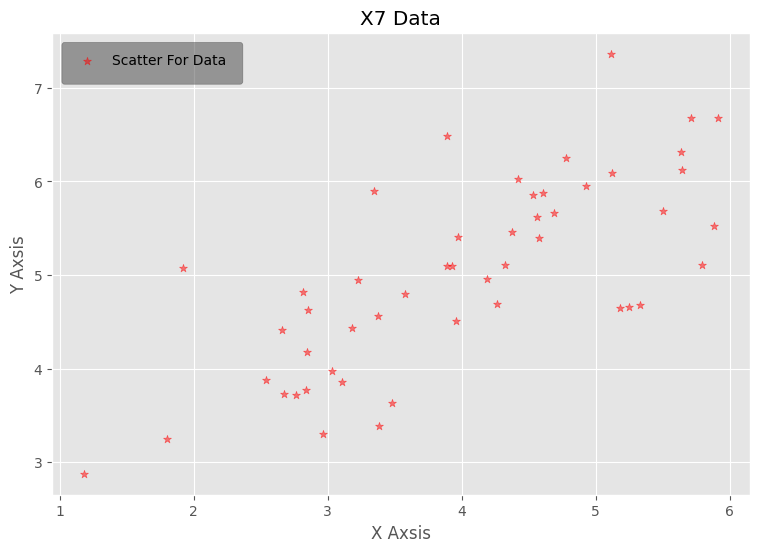

In [46]:
x7_data=data['X']
print('The Shape Of X7 Data Is ==> ',x7_data.shape)
print('\t\tThe X7 Data Is \n',x7_data)
plt.style.use('ggplot')
fig,ax =plt.subplots(figsize=(9,6))
ax.set(title ='X7 Data',xlabel='X Axsis',ylabel='Y Axsis')
ax.scatter(x7_data[: , 0],x7_data[: , 1],color ='red',alpha= 0.5,marker ='*',label ='Scatter For Data')
ax.legend(loc='upper left',frameon=True,shadow=True,fancybox=True,framealpha=0,borderpad=1)

In [57]:
#Create Function Principal Components Analysis
def PCA (x):
    #The First Step Make Normalize
    x_normalize = (x - x.mean())/ x.std()
    #Second Compute The Covariance Matrix
    x_matrix = np.matrix(x_normalize)
    cov = (x_matrix.T * x_matrix) / x_matrix.shape[0]
    print('\t\tThe Covariance Matrix Is ==> \n',cov)
    print('**'*40)
    #Make Perform SVD 
    U,S,V =np.linalg.svd(cov)#Makeing Singluar Value Decomposition
    return U,S,V
#===============================================================================
#Make Function Project Data 
def Project_data(x,u,k):
    u_reduced = U[: ,:k]
    return np.dot(x,u_reduced)
#================================================================================
#Make Function Recover Data 
def recover_data(z,u,k):
    u_reduced =u[:,:k]
    return np.dot(z,u_reduced.T)
#===============================================================================
U , S , V =PCA(x7_data)
print('\t\t The Value Of U Is \n',U)
print('**'*40)
print('The Value Of S Is ==> ',S)
print('**'*40)
print('\t\t The Value Of V Is \n',V)
print('**'*40)
#==============================================================================
#The Value Of Project_Data
Z_project_data = Project_data(x7_data,U,10)
print('\t\t The Project Data Is \n',Z_project_data)
print('**'*40)
#===============================================================================

		The Covariance Matrix Is ==> 
 [[1.11151143 0.4213388 ]
 [0.4213388  0.88848857]]
********************************************************************************
		 The Value Of U Is 
 [[-0.79241747 -0.60997914]
 [-0.60997914  0.79241747]]
********************************************************************************
The Value Of S Is ==>  [1.43584536 0.56415464]
********************************************************************************
		 The Value Of V Is 
 [[-0.79241747 -0.60997914]
 [-0.60997914  0.79241747]]
********************************************************************************
		 The Project Data Is 
 [[-4.74689738  0.62290942]
 [-7.15889408  1.87704347]
 [-4.79563345  1.87623115]
 [-4.45754509  1.25742322]
 [-4.80263579  1.57240198]
 [-7.04081342  2.76827763]
 [-4.97025076  0.75856414]
 [-8.75934561  1.68818896]
 [-6.2232703   1.6435548 ]
 [-7.04497331  1.67337619]
 [-6.91702866  1.48710438]
 [-6.79543508  1.66085667]
 [-6.3438312   1.36933994]
 [-6.99891495

In [58]:
Z_recovered_data = recover_data(Z_project_data,U,10)
print('The Shape Of Z_Recovered Data Is ==> ',Z_recovered_data.shape)
print('\t\t The Recovered Data Is \n',Z_recovered_data)

The Shape Of Z_Recovered Data Is ==>  (50, 2)
		 The Recovered Data Is 
 [[3.38156267 3.38911268]
 [4.52787538 5.8541781 ]
 [2.65568187 4.41199472]
 [2.76523467 3.71541365]
 [2.84656011 4.17550645]
 [3.89067196 6.48838087]
 [3.47580524 3.63284876]
 [5.91129845 6.68076853]
 [3.92889397 5.09844661]
 [4.56183537 5.62329929]
 [4.57407171 5.39765069]
 [4.37173356 5.46116549]
 [4.19169388 4.95469359]
 [5.24408518 4.66148767]
 [2.8358402  3.76801716]
 [5.63526969 6.31211438]
 [4.68632968 5.6652411 ]
 [2.85051337 4.62645627]
 [5.1101573  7.36319662]
 [5.18256377 4.64650909]
 [5.70732809 6.68103995]
 [3.57968458 4.80278074]
 [5.63937773 6.12043594]
 [4.26346851 4.68942896]
 [2.53651693 3.88449078]
 [3.22382902 4.94255585]
 [4.92948801 5.95501971]
 [5.79295774 5.10839305]
 [2.81684824 4.81895769]
 [3.88882414 5.10036564]
 [3.34323419 5.89301345]
 [5.87973414 5.52141664]
 [3.10391912 3.85710242]
 [5.33150572 4.68074235]
 [3.37542687 4.56537852]
 [4.77667888 6.25435039]
 [2.6757463  3.73096988]
 [